In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
seed=42

In [2]:
# Load data
from src.data import make_dataset
molecules=make_dataset.load()

RDKit WARNING: [00:26:06] Enabling RDKit 2019.09.2 jupyter extensions


In [3]:
# Build the features
from src.features import build_features
X=build_features.build(molecules)

In [26]:
# Build the targets
from src.features import build_targets
(y,aptamers)=build_targets.build_fold(molecules)

Column names are Target, H960-266, H960-319, H960-850, H960-892, H960-735, H960-425, H960-940, H960-613, H960-251, H960-003, H960-875, H960-650, H960-172, H960-186, H960-050, H960-594, H960-228, H960-316, H960-488, H960-629, H960-668, H960-5050, H960-561, H960-156, H960-922, H960-843, H960-616, H960-617, H960-505, H960-072, H960-724, H960-315, H960-939, H960-256, H960-920, H960-869, H960-356, H960-337, H960-540, NSRef-630, NS-404, NS-231, NS-160, Amb-767, Amb-563, Amb-113, Amb-751, Amb-816, Amb-720, Amb-318, Amb-6319
Processed 101 targets.
['1A4', '1C5', '1C7', '1F7', '101B7', '101C7', '101D11', '101D7', '101D9', '101E10', '101E6', '101F11', '101F2', '101F7', '101G6', '101H6', '111E3', '111H2', '111H7', '11D3', '21G8', '31B11', '31B9', '31C10', '31C2', '31C3', '31C8', '31D4', '31D7', '31D8', '31E10', '31E3', '31E4', '31E7', '31E9', '31F10', '31H10', '41A11', '41C4', '41C5', '41C7', '41D10', '41D4', '41D7', '41E10', '41E2', '41E3', '41E4', '41E7', '41E9', '41F10', '41F2', '41F3', '41F4'

In [27]:
# Create train/test sets
from src.models import split_data
X_train, X_test, y_train, y_test, ind_train, ind_test = split_data.split(0.4,X,y,seed)
mol_test=[molecules[x] for x in ind_test]
mol_train=[molecules[x] for x in ind_train]

Fraction hits: train: 1.015, test: 1.016


In [50]:
# Train model
from src.models import train_model
models=[train_model.train_multi(train_model.train_linearsvr,X_train,y_train)]

/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to conver

------
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=42, tol=0.0001, verbose=0)
Train:
score= [0.9999992716158789, 0.9999998456442095, 0.9999998639031777, 0.9999978698759123, 0.9999997056156911, 0.9999993641185843, 0.9999997421506112, 0.9999986672379612, 0.9999998543123726, 0.9993270238400713, 0.9999996501650068, 0.9999992687113056, 0.9999996310967894, 0.9999980830999865, 0.999999586976197, 0.9999993840802488, 0.9999997804722329, 0.9999994966081558, 0.999999729374822, 0.9999991384715179, 0.9999998998129049, 0.9999993869407591, 0.9999999011867364, 0.9999998841823902, 0.9999995693965075, 0.999999582077113, 0.9999999166500928, 0.9999995457408467, 0.9999995121797506, 0.9999993788541262, 0.9999999042114845, 0.9999996998751133, 0.9999980876865205, 0.9999997158412129, 0.9999802184228667, 0.9999989911159326, 0.9999984577153125, 0.9999997906309072, 0.9999996679604177, 0.99999964561

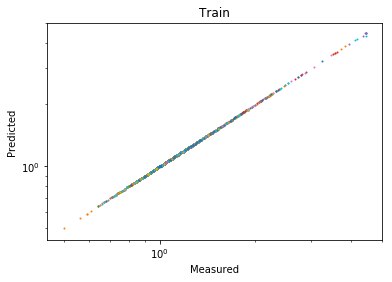

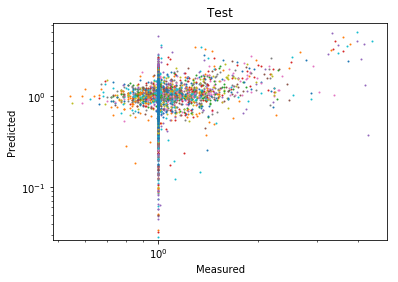

In [51]:
# Test model
from src.models import predict_model
import matplotlib.pyplot as plt
for model in models:
    print("------")
    print(model[0])
    print("Train:")
    yp_train=predict_model.predict_reg(model,X_train,y_train,mol_train)
    print("Test:")
    yp_test=predict_model.predict_reg(model,X_test,y_test,mol_test)

    for i in range(len(y_train[0])):
        plt.scatter([y[i] for y in y_train],[y[i] for y in yp_train],label="Train",s=1)
    ax=plt.gca()
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.xlabel("Measured")
    plt.ylabel("Predicted")
    plt.title("Train")
    plt.show()
    
    for i in range(len(y_test[0])):
        plt.scatter([y[i] for y in y_test],[y[i] for y in yp_test],label="Test",s=1)
    ax=plt.gca()
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.xlabel("Measured")
    plt.ylabel("Predicted")
    plt.title("Test")
    plt.show()

